In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
data = pd.read_csv("index_data.csv")

In [54]:
data.head()

,Sno,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,1.0,Rural,2013.0,January,107.5,106.3,108.1,104.9,106.1,103.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,2.0,Urban,2013.0,January,110.5,109.1,113.0,103.6,103.4,102.3,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,3.0,Rural+Urban,2013.0,January,108.4,107.3,110.0,104.4,105.1,103.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,4.0,Rural,2013.0,February,109.2,108.7,110.2,105.4,106.7,104.0,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,5.0,Urban,2013.0,February,112.9,112.9,116.9,104.0,103.5,103.1,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [55]:
data.tail(10)

,Sno,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
263,264.0,Rural+Urban,2020.0,May,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,265.0,Rural,2020.0,June,148.2,190.3,149.4,153.3,138.2,143.2,...,NaN,144.9,151.7,158.2,141.4,153.2,161.8,151.2,151.7,152.7
265,266.0,Urban,2020.0,June,152.7,197.0,154.6,153.4,132.9,151.8,...,154.7,137.1,140.4,148.1,129.3,144.5,152.5,152.2,142.0,150.8
266,267.0,Rural+Urban,2020.0,June,149.6,192.7,151.4,153.3,136.3,147.2,...,154.7,141.9,146.4,154.4,135.0,148.3,156.4,151.6,147.0,151.8
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data exploration

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sno                                  267 non-null    float64
 1   Sector                               268 non-null    object 
 2   Year                                 267 non-null    float64
 3   Month                                267 non-null    object 
 4   Cereals and products                 264 non-null    float64
 5   Meat and fish                        261 non-null    float64
 6   Egg                                  264 non-null    float64
 7   Milk and products                    264 non-null    float64
 8   Oils and fats                        264 non-null    float64
 9   Fruits                               264 non-null    float64
 10  Vegetables                           264 non-null    float64
 11  Pulses and products             

In [57]:
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
Sno,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,264.0,265.0,266.0,267.0,NaN,NaN,NaN,NaN,NaN,NaN
Sector,Rural,Urban,Rural+Urban,Rural,Urban,Rural+Urban,Rural,Urban,Rural+Urban,Rural,...,Rural+Urban,Rural,Urban,Rural+Urban,NaN,NaN,NaN,NaN,NaN,s
Year,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,...,2020.0,2020.0,2020.0,2020.0,NaN,NaN,NaN,NaN,NaN,NaN
Month,January,January,January,February,February,February,March,March,March,April,...,May,June,June,June,NaN,NaN,NaN,NaN,NaN,NaN
Cereals and products,107.5,110.5,108.4,109.2,112.9,110.4,110.2,113.9,111.4,110.2,...,NaN,148.2,152.7,149.6,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
data.columns

Index(['Sno', 'Sector', 'Year', 'Month', 'Cereals and products',
       'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits',
       'Vegetables', 'Pulses and products', 'Sugar and Confectionery',
       'Spices', 'Non-alcoholic beverages',
       'Prepared meals, snacks, sweets etc.', 'Food and beverages',
       'Pan, tobacco and intoxicants', 'Clothing', 'Footwear',
       'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

In [59]:
data.head(10)

,Sno,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,1.0,Rural,2013.0,January,107.5,106.3,108.1,104.9,106.1,103.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,2.0,Urban,2013.0,January,110.5,109.1,113.0,103.6,103.4,102.3,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,3.0,Rural+Urban,2013.0,January,108.4,107.3,110.0,104.4,105.1,103.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,4.0,Rural,2013.0,February,109.2,108.7,110.2,105.4,106.7,104.0,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,5.0,Urban,2013.0,February,112.9,112.9,116.9,104.0,103.5,103.1,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
5,6.0,Rural+Urban,2013.0,February,110.4,110.2,112.8,104.9,105.5,103.6,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3
6,7.0,Rural,2013.0,March,110.2,108.8,109.9,105.6,106.2,105.7,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,8.0,Urban,2013.0,March,113.9,111.4,113.2,104.3,102.7,104.9,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
8,9.0,Rural+Urban,2013.0,March,111.4,109.7,111.2,105.1,104.9,105.3,...,100.4,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5
9,10.0,Rural,2013.0,April,110.2,109.5,106.9,106.3,105.7,108.3,...,NaN,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4


# Data processing

In [60]:
data["Month"].isnull().sum()

6

In [61]:
data = data.fillna(data.median())

<ipython-input-61-1ed84e2e0a3e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [62]:
data.isna().sum()

Sno                                    0
Sector                                 5
Year                                   0
Month                                  6
Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Housing                                0
Fuel and light                         0
Household goods and services           0
Health          

In [63]:
data = data.dropna()

In [64]:
data.isna().sum()

Sno                                    0
Sector                                 0
Year                                   0
Month                                  0
Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Housing                                0
Fuel and light                         0
Household goods and services           0
Health          

In [65]:
len(data)

267

In [66]:
data.drop("Sno", axis=1, inplace=True)

In [67]:
data.columns

Index(['Sector', 'Year', 'Month', 'Cereals and products', 'Meat and fish',
       'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables',
       'Pulses and products', 'Sugar and Confectionery', 'Spices',
       'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.',
       'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing',
       'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

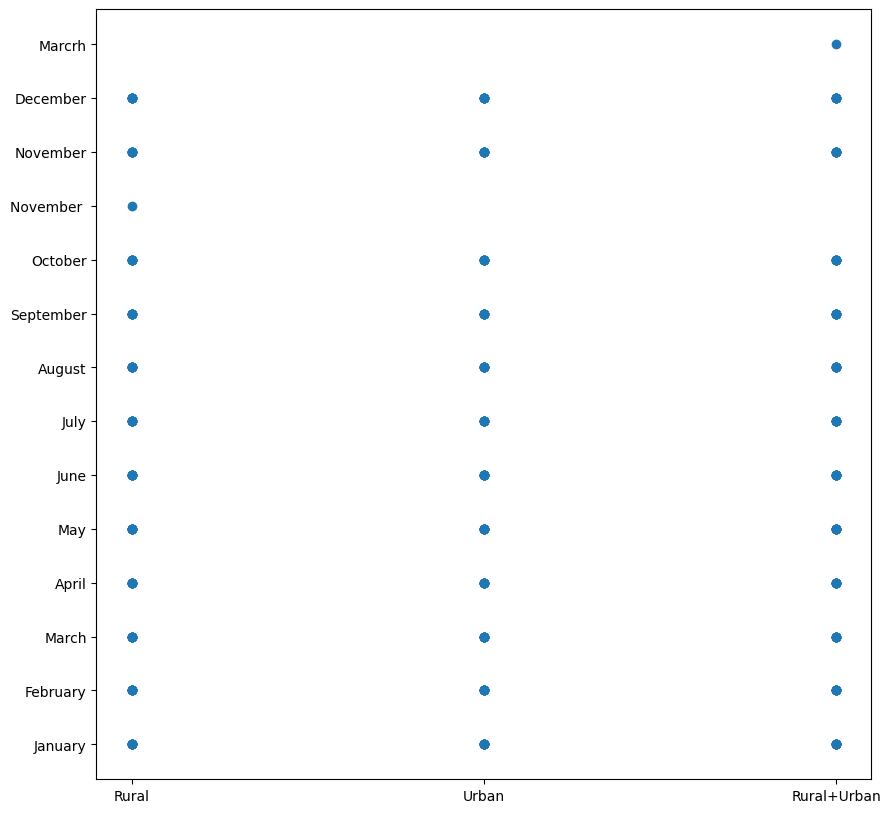

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data["Sector"], data["Month"])

<BarContainer object of 267 artists>

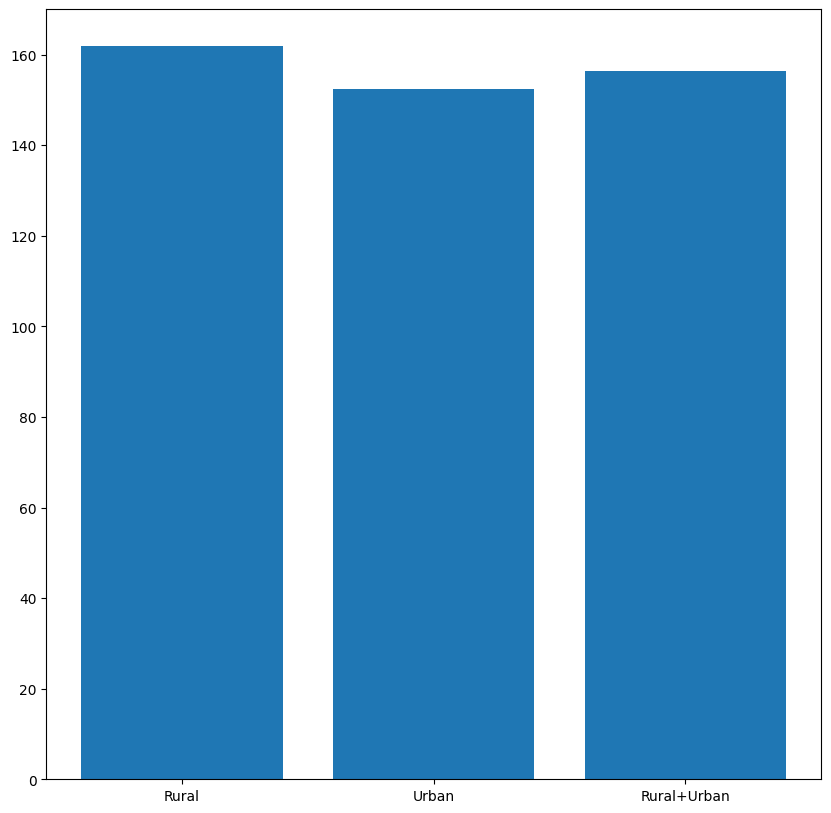

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(data["Sector"], data["Education"])

Text(0, 0.5, 'Health')

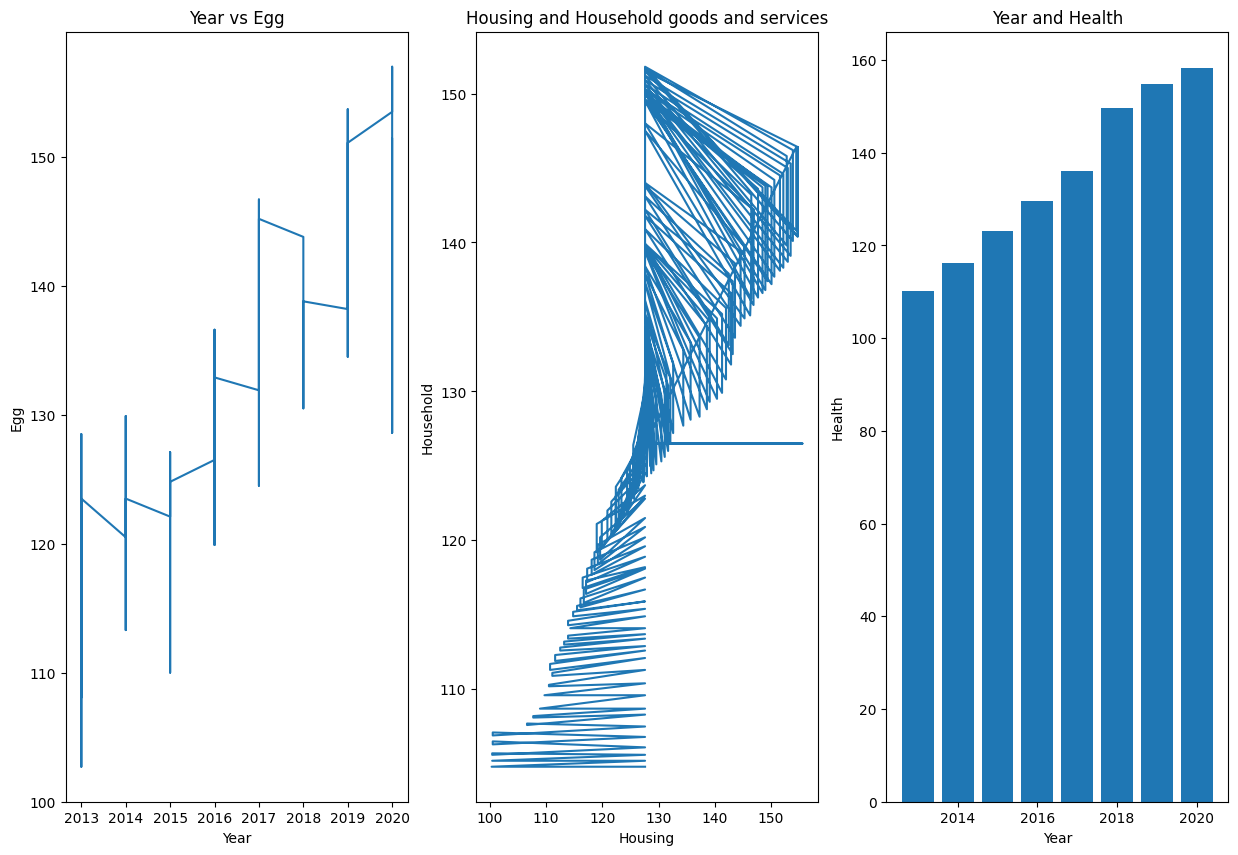

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].plot(data["Year"], data["Egg"])
ax[0].set_title("Year vs Egg")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Egg")

ax[1].plot(data["Housing"], data["Household goods and services"])
ax[1].set_title("Housing and Household goods and services")
ax[1].set_xlabel("Housing")
ax[1].set_ylabel("Household")

ax[2].bar(data["Year"], data["Health"])
ax[2].set_title("Year and Health")
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Health")

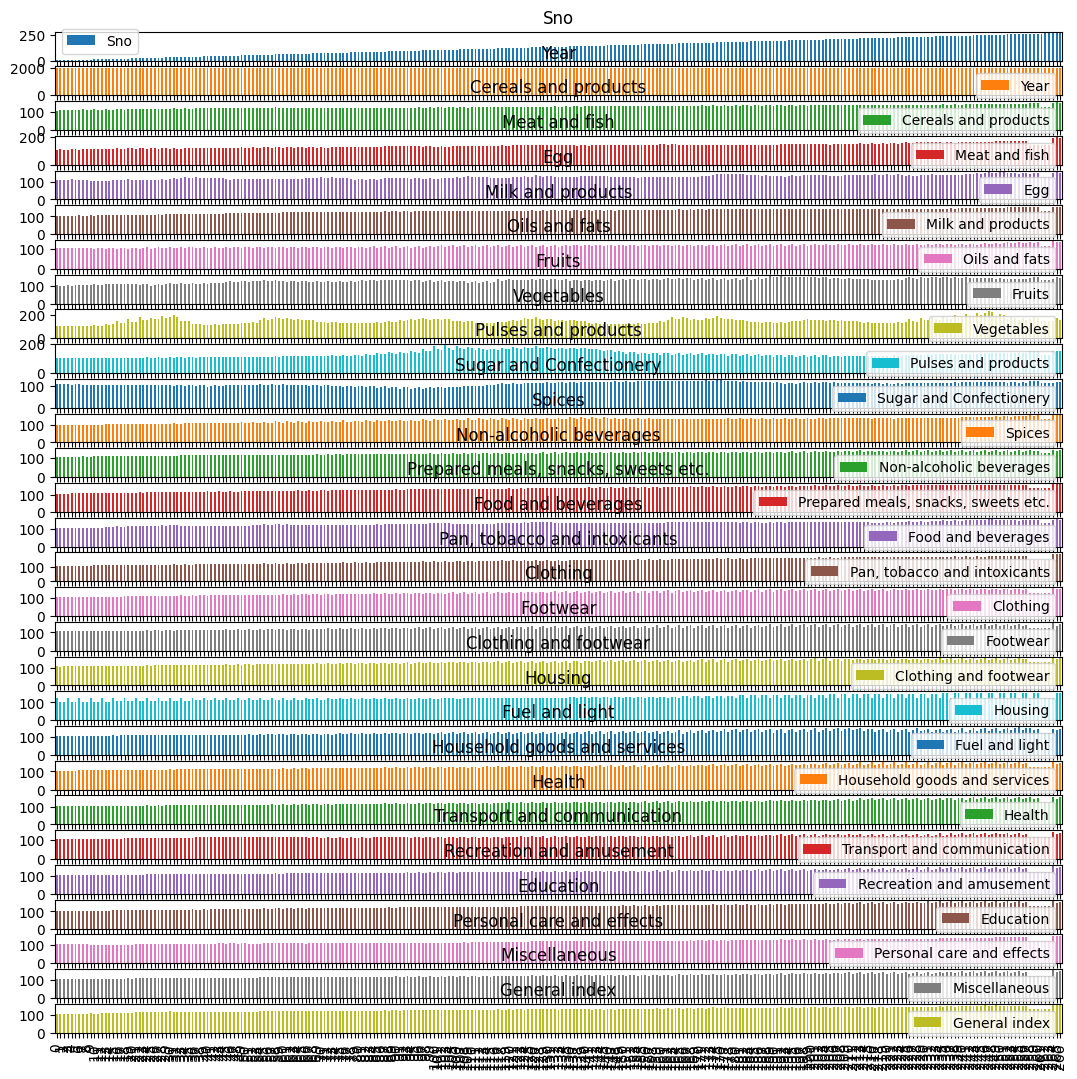

In [20]:
data.plot.bar(figsize=(13, 13), subplots=True);

<ipython-input-21-5999720ae98c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

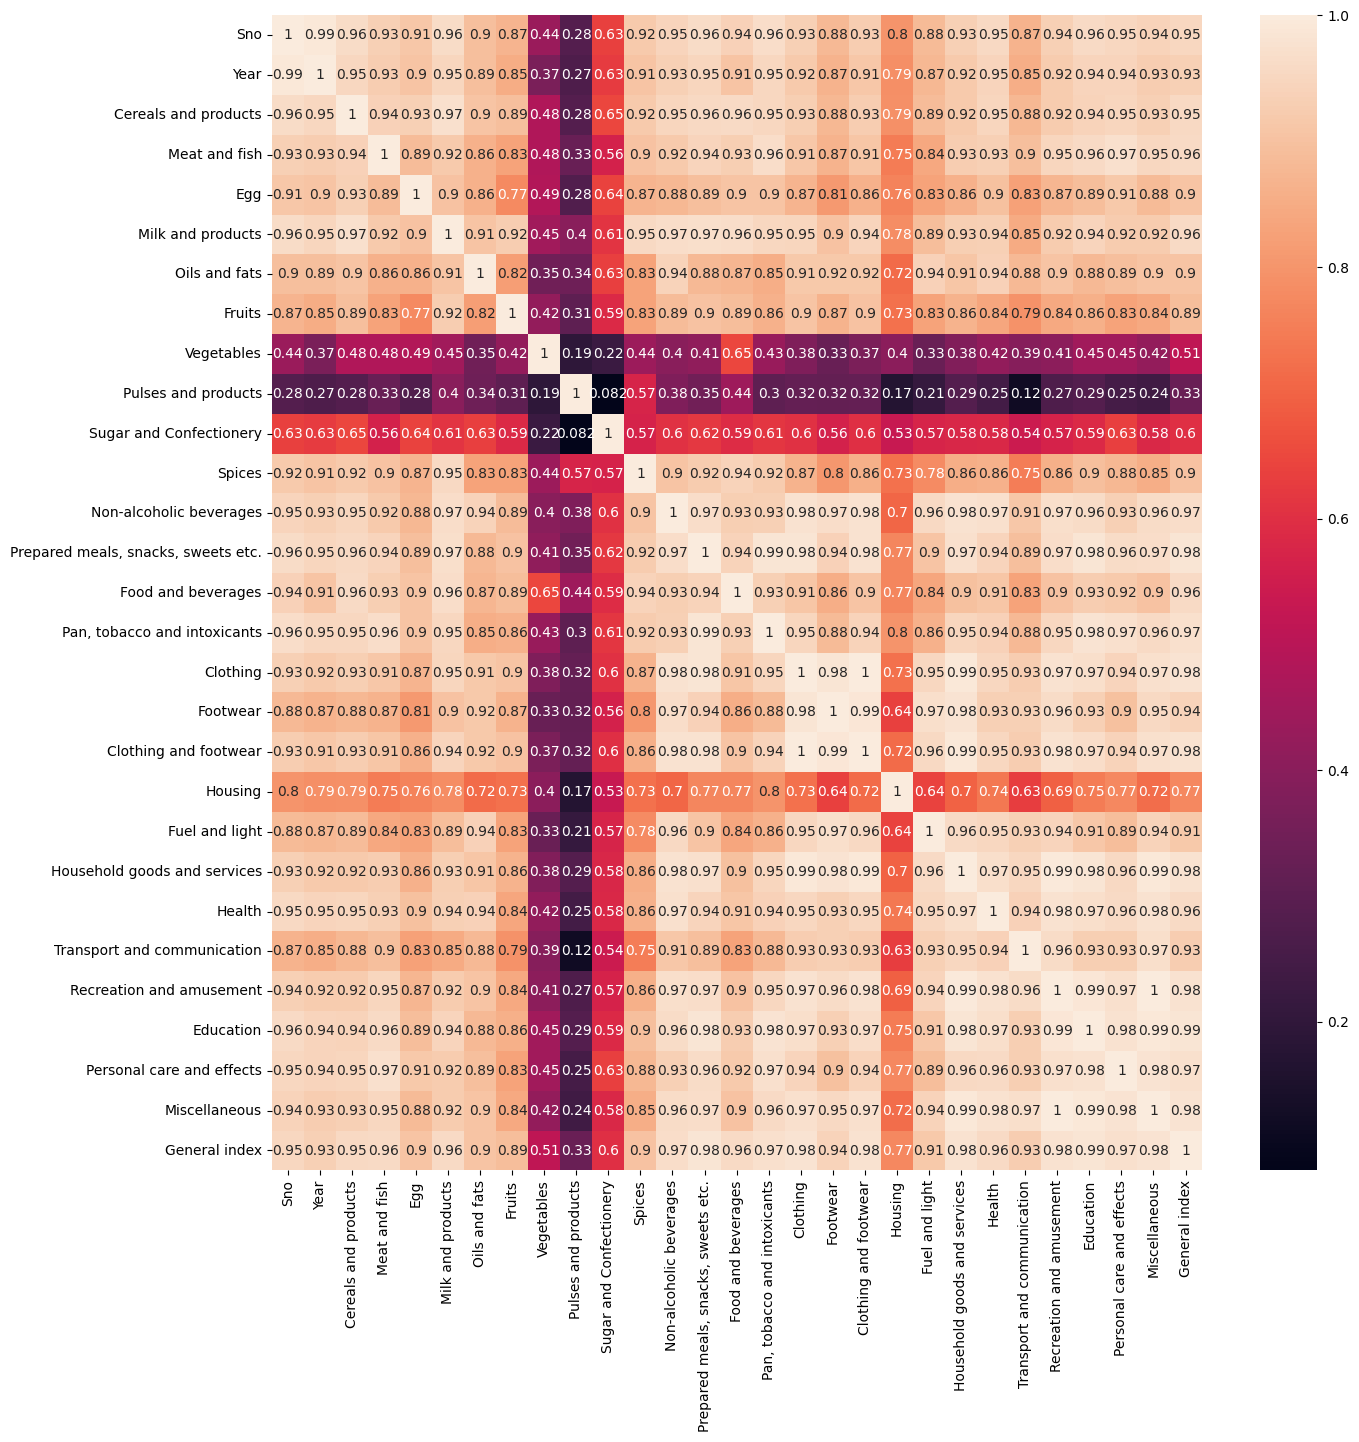

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

In [68]:
scaler = StandardScaler()
data.columns

Index(['Sector', 'Year', 'Month', 'Cereals and products', 'Meat and fish',
       'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables',
       'Pulses and products', 'Sugar and Confectionery', 'Spices',
       'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.',
       'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing',
       'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

In [69]:
for label, content in data.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

Sector
Month


In [70]:
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    data[label] = content.astype("category").cat.codes

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               267 non-null    int8   
 1   Year                                 267 non-null    float64
 2   Month                                267 non-null    int8   
 3   Cereals and products                 267 non-null    float64
 4   Meat and fish                        267 non-null    float64
 5   Egg                                  267 non-null    float64
 6   Milk and products                    267 non-null    float64
 7   Oils and fats                        267 non-null    float64
 8   Fruits                               267 non-null    float64
 9   Vegetables                           267 non-null    float64
 10  Pulses and products                  267 non-null    float64
 11  Sugar and Confectionery         

In [72]:
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
      print(label)

Sector
Year
Month
Cereals and products
Meat and fish
Egg
Milk and products
Oils and fats
Fruits
Vegetables
Pulses and products
Sugar and Confectionery
Spices
Non-alcoholic beverages
Prepared meals, snacks, sweets etc.
Food and beverages
Pan, tobacco and intoxicants
Clothing
Footwear
Clothing and footwear
Housing
Fuel and light
Household goods and services
Health
Transport and communication
Recreation and amusement
Education
Personal care and effects
Miscellaneous
General index


In [73]:
data.Sector

0      0
1      2
2      1
3      0
4      2
      ..
262    2
263    1
264    0
265    2
266    1
Name: Sector, Length: 267, dtype: int8

In [74]:
data.Month

0      4
1      4
2      4
3      3
4      3
      ..
262    9
263    9
264    6
265    6
266    6
Name: Month, Length: 267, dtype: int8

In [75]:
X = data.drop("General index", axis=1)
y = data["General index"]

In [76]:
len(X), len(y)

(267, 267)

In [77]:
scaler.fit_transform(X)

array([[-1.22474487e+00, -1.49309003e+00, -4.96111334e-01, ...,
        -1.73824881e+00, -1.35181219e+00, -1.64996197e+00],
       [ 1.22474487e+00, -1.49309003e+00, -4.96111334e-01, ...,
        -1.75742939e+00, -1.38601502e+00, -1.67598169e+00],
       [ 0.00000000e+00, -1.49309003e+00, -4.96111334e-01, ...,
        -1.75103587e+00, -1.36891361e+00, -1.65863521e+00],
       ...,
       [-1.22474487e+00,  1.73675403e+00,  9.30790495e-04, ...,
         1.96999617e+00,  2.62426615e+00,  2.48717320e+00],
       [ 1.22474487e+00,  1.73675403e+00,  9.30790495e-04, ...,
         1.37539826e+00,  2.70977321e+00,  1.64586898e+00],
       [ 0.00000000e+00,  1.73675403e+00,  9.30790495e-04, ...,
         1.62474577e+00,  2.65846898e+00,  2.07953095e+00]])

In [78]:
X

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Clothing and footwear,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous
0,0,2013.0,4,107.5,106.3,108.1,104.9,106.1,103.9,101.90,...,106.4,127.6,105.5,104.8,104.00,103.3,103.4,103.8,104.7,104.0
1,2,2013.0,4,110.5,109.1,113.0,103.6,103.4,102.3,102.90,...,105.8,100.3,105.4,104.8,104.10,103.2,102.9,103.5,104.3,103.7
2,1,2013.0,4,108.4,107.3,110.0,104.4,105.1,103.2,102.20,...,106.2,100.3,105.5,104.8,104.00,103.2,103.1,103.6,104.5,103.9
3,0,2013.0,3,109.2,108.7,110.2,105.4,106.7,104.0,102.40,...,107.0,127.6,106.2,105.2,104.40,103.9,104.0,104.1,104.6,104.4
4,2,2013.0,3,112.9,112.9,116.9,104.0,103.5,103.1,104.90,...,106.4,100.4,105.7,105.2,104.70,104.4,103.3,103.7,104.3,104.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2,2020.0,9,129.3,138.2,128.6,133.3,115.4,135.1,145.45,...,131.4,127.6,123.5,126.5,123.95,114.1,122.4,131.6,120.9,121.9
263,1,2020.0,9,129.3,138.2,128.6,133.3,115.4,135.1,145.45,...,131.4,127.6,123.5,126.5,123.95,114.1,122.4,131.6,120.9,121.9
264,0,2020.0,6,148.2,190.3,149.4,153.3,138.2,143.2,148.90,...,154.1,127.6,144.9,151.7,158.20,141.4,153.2,161.8,151.2,151.7
265,2,2020.0,6,152.7,197.0,154.6,153.4,132.9,151.8,171.20,...,147.2,154.7,137.1,140.4,148.10,129.3,144.5,152.5,152.2,142.0


In [90]:
np.floor(len(X)*0.2)


53.0

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
X_train

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Clothing and footwear,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous
19,2,2013.0,5,117.8,119.2,114.0,108.3,101.1,113.2,160.9,...,109.5,107.7,108.6,108.1,107.1,107.3,105.9,110.1,103.2,107.3
211,2,2018.0,10,138.1,146.3,137.8,141.6,118.1,141.5,145.2,...,140.5,146.9,136.7,135.8,136.8,121.2,131.3,146.1,130.5,132.2
259,2,2020.0,0,151.8,138.2,151.9,155.5,131.6,152.9,180.0,...,131.4,155.6,137.1,126.5,144.8,114.1,122.4,131.6,120.9,121.9
116,1,2016.0,7,126.5,135.1,124.6,130.2,114.5,126.2,129.8,...,130.5,124.9,122.4,125.1,122.9,110.9,120.6,126.9,117.3,119.3
175,2,2017.0,10,134.3,142.1,146.7,139.5,115.2,136.4,185.2,...,133.5,138.6,125.7,128.8,127.4,115.3,125.1,136.6,124.9,124.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1,2019.0,6,138.7,162.1,137.8,143.3,122.2,146.8,150.5,...,147.4,149.4,141.2,143.8,147.4,124.6,139.6,152.5,134.3,138.6
120,0,2016.0,9,127.6,137.5,124.4,132.4,118.2,138.1,141.8,...,134.8,127.6,127.4,128.5,125.8,115.1,123.6,129.1,119.7,122.5
180,0,2018.0,4,136.6,144.4,143.8,142.0,123.2,147.9,152.1,...,147.5,127.6,142.3,139.8,136.0,122.7,134.3,141.6,128.6,132.3
138,0,2016.0,10,132.0,137.4,130.6,136.2,121.1,136.9,141.8,...,139.2,127.6,130.3,132.1,129.1,118.2,126.9,133.7,123.5,126.1


In [93]:
len(X_train), len(X_test)

(213, 54)

In [94]:
y_val.shape, y_test.shape

((60,), (54,))

In [95]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=1000)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9995230373301291

In [100]:
y_pred = clf.predict(X_test)
y_pred

array([120.4684, 118.9458, 136.8735, 126.3851, 132.6624, 119.5026,
       139.7746, 123.1324, 138.684 , 127.7447, 104.8055, 141.7123,
       112.052 , 142.1652, 141.4675, 124.7115, 119.8942, 149.0007,
       150.1833, 119.5056, 114.146 , 135.2899, 126.3735, 134.6264,
       139.25  , 130.7861, 134.1797, 124.4765, 132.    , 113.5559,
       150.7663, 149.2797, 124.3756, 141.686 , 133.2254, 128.2886,
       137.1253, 113.9874, 120.5885, 119.7224, 137.9542, 113.8873,
       127.9213, 132.7669, 111.0069, 122.5707, 134.8934, 136.1838,
       143.2752, 149.4002, 137.8917, 144.4065, 115.625 , 140.7711])

In [105]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
def metrics(y_val, y_pred):
  evaluation = {"Mean Squared log error score": mean_squared_log_error(y_val, y_pred),
                "Mean Squared error score": mean_squared_error(y_val, y_pred),
                "Mean absolute error score": mean_absolute_error(y_val, y_pred),
                "R2 square score": r2_score(y_val, y_pred)}
  return evaluation

In [106]:
metrics(y_test, y_pred)

{'Mean Squared log error score': 1.7188151024824373e-05,
 'Mean Squared error score': 0.32934209092600936,
 'Mean absolute error score': 0.43262407407420617,
 'R2 square score': 0.9975747207057062}

In [108]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(n_jobs=1000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)


0.9991764689841925

In [109]:
y_lr_pred = lr_clf.predict(X_test)

In [110]:
metrics(y_test, y_lr_pred)

{'Mean Squared log error score': 6.382706985161935e-06,
 'Mean Squared error score': 0.11183183203953828,
 'Mean absolute error score': 0.2527139067667924,
 'R2 square score': 0.9991764689841925}

In [111]:
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor()
tree_clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [112]:
y_tree_pred = tree_clf.predict(X_test)

In [113]:
metrics(y_test, y_tree_pred)

{'Mean Squared log error score': 5.5310463949338864e-05,
 'Mean Squared error score': 1.0718518518518523,
 'Mean absolute error score': 0.7074074074074069,
 'R2 square score': 0.9921068694999242}

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [132]:
X_train.shape

(213, 29)

In [133]:
model.build((None, 29))


In [134]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                960       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1505 (5.88 KB)
Trainable params: 1505 (5.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["mean_absolute_error"])

In [141]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="mean_absolute_error", patience=3)

In [142]:
from tensorflow.python.eager.backprop import val_and_grad_function

In [143]:
def train_model():
  model.fit(X_train,
            y_train,
            epochs=50,
            callbacks=early_stopping)
  return model

In [144]:
train_model()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 1s 6ms/step - loss: 1.5302e-05 - mean_absolute_error: 80.3099
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5302e-05 - mean_absolute_error: 80.3099
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5302e-05 - mean_absolute_error: 80.3099
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 1.5302e-05 - mean_absolute_error: 80.3099
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5302e-05 - mean_absolute_error: 80.3099


In [145]:
%%time
pred = model.predict(X_test, verbose=True)

2/2 [==============================] - 0s 5ms/step
CPU times: user 293 ms, sys: 0 ns, total: 293 ms
Wall time: 353 ms


In [146]:
metrics(y_test, pred)

{'Mean Squared log error score': 0.22869545033305053,
 'Mean Squared error score': 6212.127143989602,
 'Mean absolute error score': 77.64354722764757,
 'R2 square score': -44.746182316014966}